In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error as mae

%matplotlib inline

In [2]:
df = pd.read_csv('./data/2018-to-2019-10-17-coinbase_BTC-EUR_60.csv', parse_dates=['Date'])
df.tail()

,Date,Low,High,Open,Close,Volume BTC
794316,2019-10-17 00:55:00,7237.62,7243.23,7237.62,7239.22,0.093392
794317,2019-10-17 00:56:00,7228.82,7240.90,7228.82,7240.90,0.076244
794318,2019-10-17 00:57:00,7232.22,7233.43,7232.22,7233.43,0.033761
794319,2019-10-17 00:59:00,7242.59,7242.59,7242.59,7242.59,0.014968
794320,2019-10-17 01:00:00,7231.82,7237.27,7237.27,7235.99,0.160142


/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



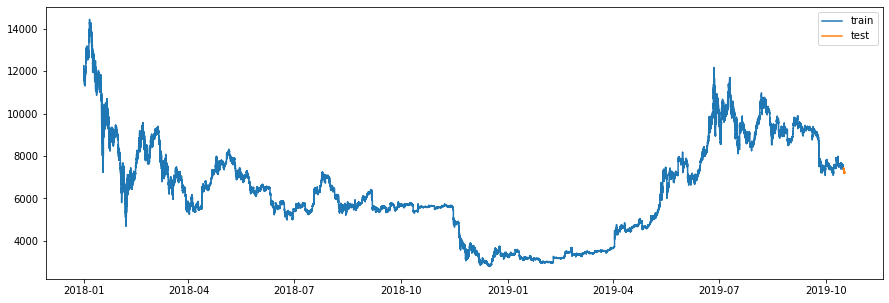

In [3]:
train = df[ df.Date < '2019-10-16' ]
test = df[ df.Date >= '2019-10-16' ]

plt.figure(figsize=(15,5))
plt.plot( train.Date, train.Close, label='train' )
plt.plot( test.Date, test.Close, label='test' )
plt.legend();

## Prophet

In [4]:
fb_df = train[['Date','Close']].copy()
fb_df.columns = ['ds','y']

fb_df.head()

,ds,y
0,2018-01-01 00:00:00,12261.02
1,2018-01-01 00:01:00,12261.18
2,2018-01-01 00:02:00,12261.31
3,2018-01-01 00:03:00,12261.29
4,2018-01-01 00:04:00,12261.01


In [5]:
m = Prophet()
%time m.fit(fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 19min 4s, sys: 45.8 s, total: 19min 50s
Wall time: 19min 47s


In [6]:
future_periods = len(test)
future_periods

1147

In [7]:
%time future = m.make_future_dataframe(periods=future_periods, freq='T', include_history=False)

future.head()

CPU times: user 230 ms, sys: 80 ms, total: 310 ms
Wall time: 1.05 s


,ds
0,2019-10-15 23:47:00
1,2019-10-15 23:48:00
2,2019-10-15 23:49:00
3,2019-10-15 23:50:00
4,2019-10-15 23:51:00


In [8]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-15 23:47:00,8757.932970,7969.335519,9569.346361,8757.932970,8757.932970,11.428927,11.428927,11.428927,16.865030,16.865030,16.865030,-5.436103,-5.436103,-5.436103,0.0,0.0,0.0,8769.361897
1,2019-10-15 23:48:00,8757.931836,7970.039750,9558.855073,8757.931836,8757.931836,11.631284,11.631284,11.631284,17.068141,17.068141,17.068141,-5.436857,-5.436857,-5.436857,0.0,0.0,0.0,8769.563120
2,2019-10-15 23:49:00,8757.930701,8084.905876,9570.634602,8757.930701,8757.930701,11.828958,11.828958,11.828958,17.266547,17.266547,17.266547,-5.437589,-5.437589,-5.437589,0.0,0.0,0.0,8769.759659
3,2019-10-15 23:50:00,8757.929567,7971.834799,9510.822877,8757.929567,8757.929567,12.021889,12.021889,12.021889,17.460188,17.460188,17.460188,-5.438299,-5.438299,-5.438299,0.0,0.0,0.0,8769.951456
4,2019-10-15 23:51:00,8757.928433,8049.621976,9497.512283,8757.928433,8757.928433,12.210019,12.210019,12.210019,17.649006,17.649006,17.649006,-5.438987,-5.438987,-5.438987,0.0,0.0,0.0,8770.138452


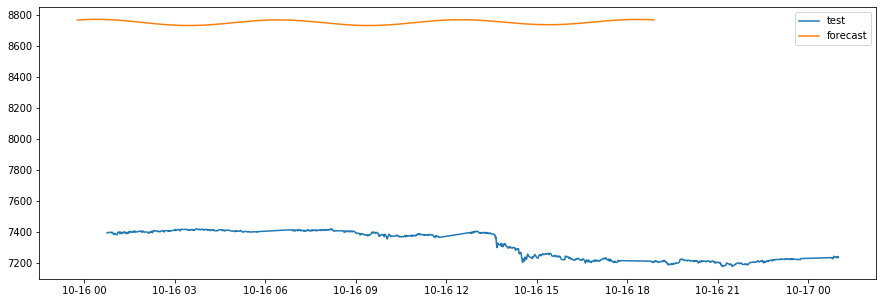

In [9]:
plt.figure(figsize=(15,5))
#plt.plot( train.Date, train.Close, label='train' )
plt.plot( test.Date, test.Close, label='test' )
plt.plot( forecast.ds, forecast.yhat, label='forecast' )
plt.legend();

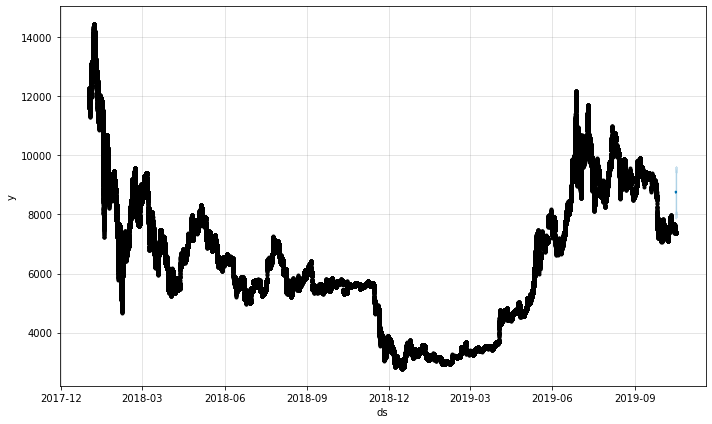

In [10]:
m.plot(forecast);